In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

connection = mysql.connector.connect(
user='root',
password='root123',
host='localhost',
database='nextflix' # write here database name 
)

In [4]:
cursor = connection.cursor()


In [5]:
cursor.execute('SELECT * FROM netflix_shows') 


In [6]:
df= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


In [7]:
# Query data from the 'netflix_shows' table
cursor.execute('SELECT * FROM netflix_shows ')
df= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [8]:
df.head()



,show_id,type,title,director_id,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,1.0,None,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s10,Movie,The Starling,7.0,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s12,TV Show,Bangkok Breaking,8.0,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",None,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
3,s13,Movie,Je Suis Karl,NaN,"Luna Wedler, Jannis Niewühner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s14,Movie,Confessions of an Invisible Girl,NaN,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",None,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


In [36]:
# Handle missing values
df.dropna(inplace=True)  # Drop rows with any missing values
 

In [37]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [39]:
# Check data consistency
# convert date columns to datetime format if needed
df['director_id'] = pd.to_datetime(df['director_id'])
df['date_added'] = pd.to_datetime(df['date_added']) 

In [41]:
df.head(5)

,show_id,type,title,director_id,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s10,Movie,The Starling,1970-01-01 00:00:00.000000007,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
30,s39,Movie,Birth of the Dragon,1970-01-01 00:00:00.000000001,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
44,s8,Movie,Sankofa,1970-01-01 00:00:00.000000005,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
45,s9,TV Show,The Great British Baking Show,1970-01-01 00:00:00.000000006,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [42]:
# Save the cleaned data to a new file
df.to_csv('cleaned_data.csv', index=False)


In [43]:
df

,show_id,type,title,director_id,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s10,Movie,The Starling,1970-01-01 00:00:00.000000007,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
30,s39,Movie,Birth of the Dragon,1970-01-01 00:00:00.000000001,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
44,s8,Movie,Sankofa,1970-01-01 00:00:00.000000005,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
45,s9,TV Show,The Great British Baking Show,1970-01-01 00:00:00.000000006,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [44]:
df.shape

(4, 12)

In [45]:
df.columns

Index(['show_id', 'type', 'title', 'director_id', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [46]:
df.groupby('type')['country'].sum()

type
Movie      United StatesChina, Canada, United StatesUnite...
TV Show                                       United Kingdom
Name: country, dtype: object

In [47]:
# List of columns to drop
columns_drop = ['show_id', 'title', 'director_id', 'type', 'cast']
columns_drop

['show_id', 'title', 'director_id', 'type', 'cast']

In [49]:
# Drop the columns from the DataFrame
cleaned_data = df.drop(columns=columns_drop, inplace=True)
cleaned_data

In [51]:
# Filter rows where  are less than 2024
release_year= df[df['release_year'] < 2024].head(10) 
release_year

,country,date_added,release_year,rating,duration,listed_in,description
1,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
30,"China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
44,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
45,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [57]:
# Filter rows where Category is 'United States' and SubCategory is '104 min'
country_duration= df.query("country == 'United States' and duration == '104 min'")
country_duration           

,country,date_added,release_year,rating,duration,listed_in,description
1,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [60]:
# Filter rows where release_year is 2021
release_year_2021=df[df['release_year'] == '2021']
release_year_2021

,country,date_added,release_year,rating,duration,listed_in,description


In [63]:
release_year_2021=df[df['release_year'] == 2021]
release_year_2021

,country,date_added,release_year,rating,duration,listed_in,description
1,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
45,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [64]:
# Display summary statistics
df.describe()

,release_year
count,4.000000
mean,2013.000000
std,13.466007
min,1993.000000
25%,2011.000000
50%,2019.000000
75%,2021.000000
max,2021.000000


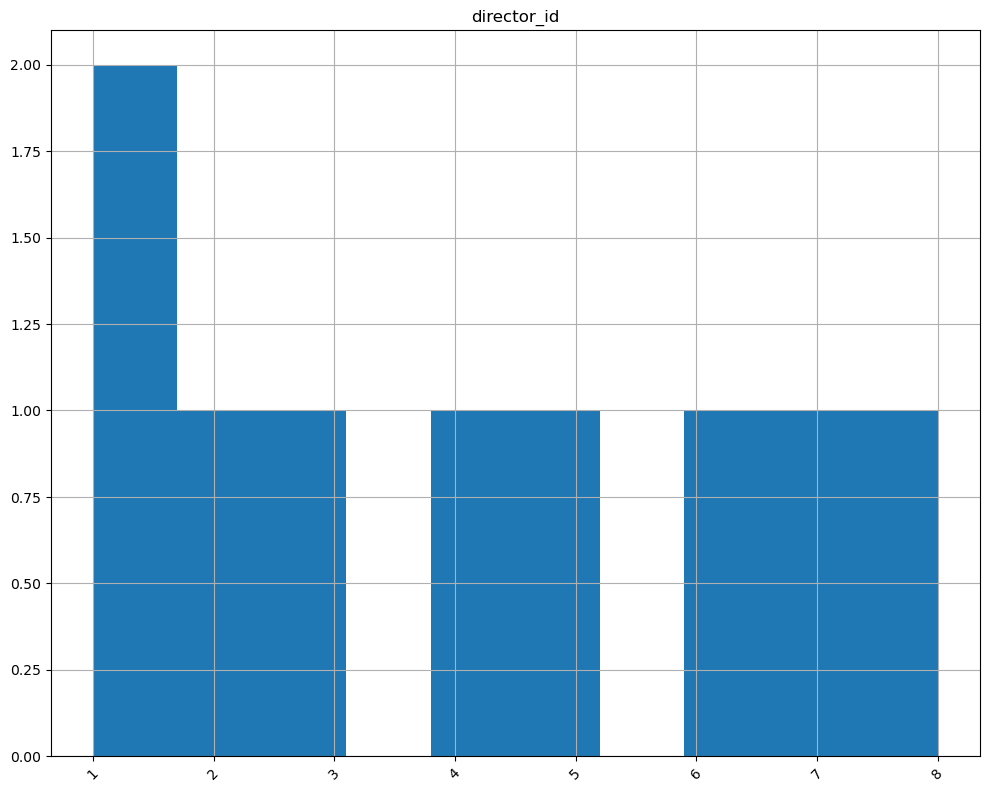

In [12]:
# Display histograms for the first 4 columns 


df.iloc[:, :4].hist(figsize=(10, 8))

# Display the first 4 rows of the DataFrame 
plt.tight_layout()
plt.xticks(rotation=45)
df.head(4)


# Show the plots
plt.show()

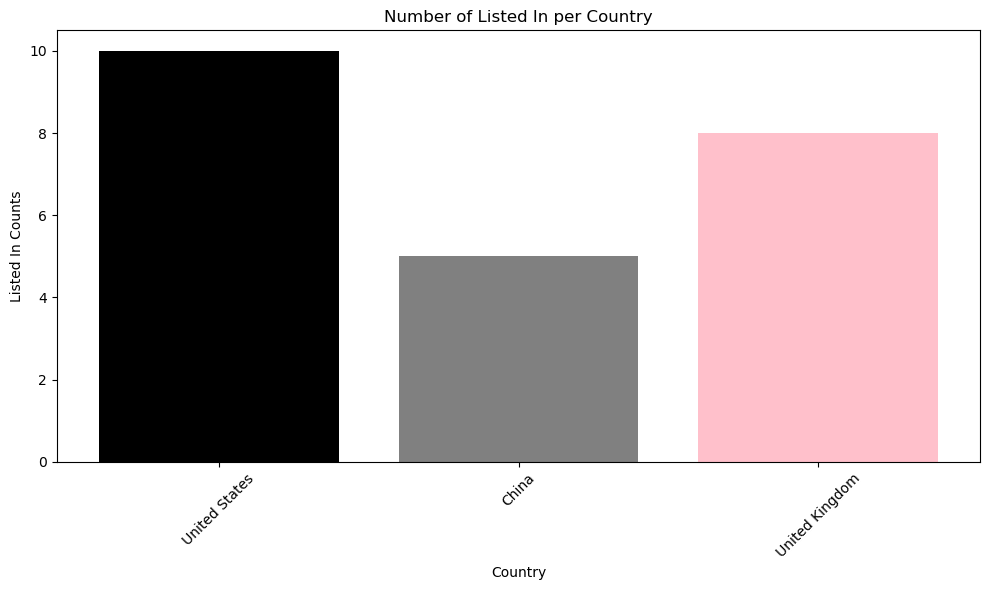

In [69]:
# Sample data
countries = ['United States', 'China', 'United Kingdom']
listed_in_counts = [10, 5, 8]  # Sample counts for each country

# Custom colors for each country
colors = {'United States': 'black', 'China': 'grey', 'United Kingdom': 'pink'}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(countries, listed_in_counts, color=[colors[c] for c in countries])  # Using custom colors
plt.xlabel('Country')
plt.ylabel('Listed In Counts')
plt.title('Number of Listed In per Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

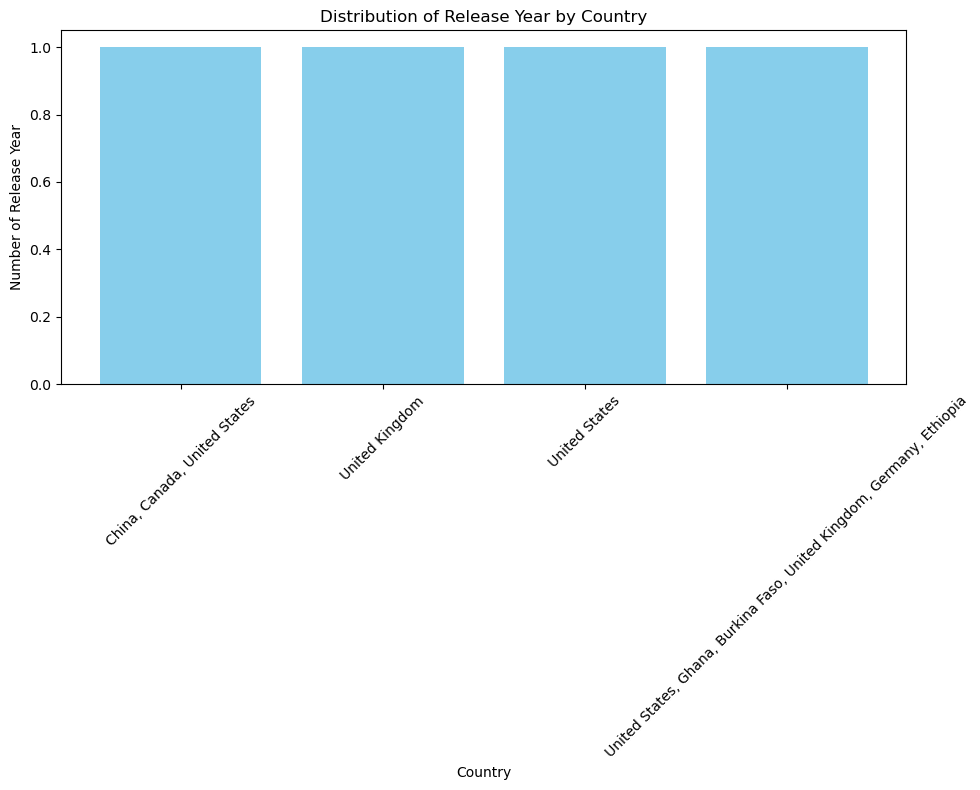

In [73]:
# Grouping the data by Country and counting the number of release year for each country
release_year_by_country = df.groupby('country')['release_year'].count().reset_index()

# Sorting the data by number of release year in descending order
release_year_by_country = release_year_by_country.sort_values(by='release_year', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.bar(release_year_by_country['country'], release_year_by_country['release_year'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Release Year')
plt.title('Distribution of Release Year by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

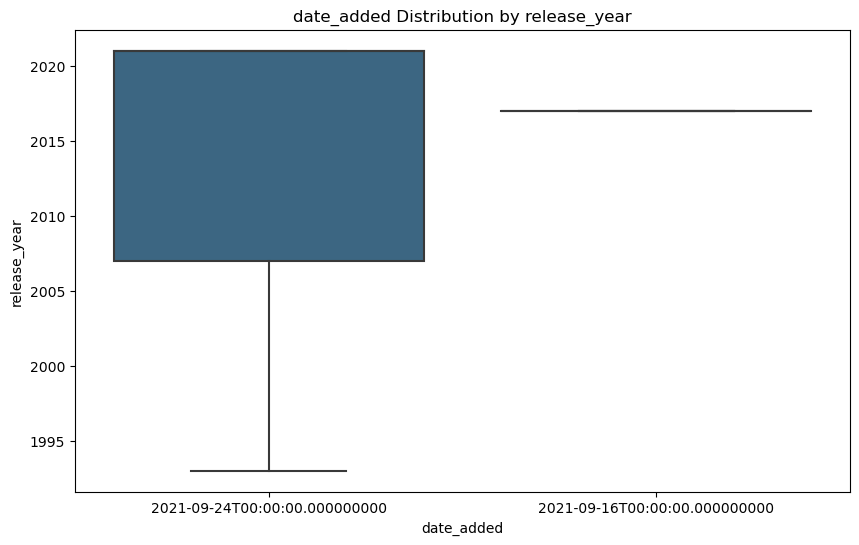

In [76]:
# Plotting the boxplot with 'date_added' instead of 'release_year'
plt.figure(figsize=(10, 6))
sns.boxplot(x='date_added', y='release_year', data=df, palette='viridis')
plt.title('date_added Distribution by release_year')
plt.xlabel('date_added')
plt.ylabel('release_year')
plt.show()

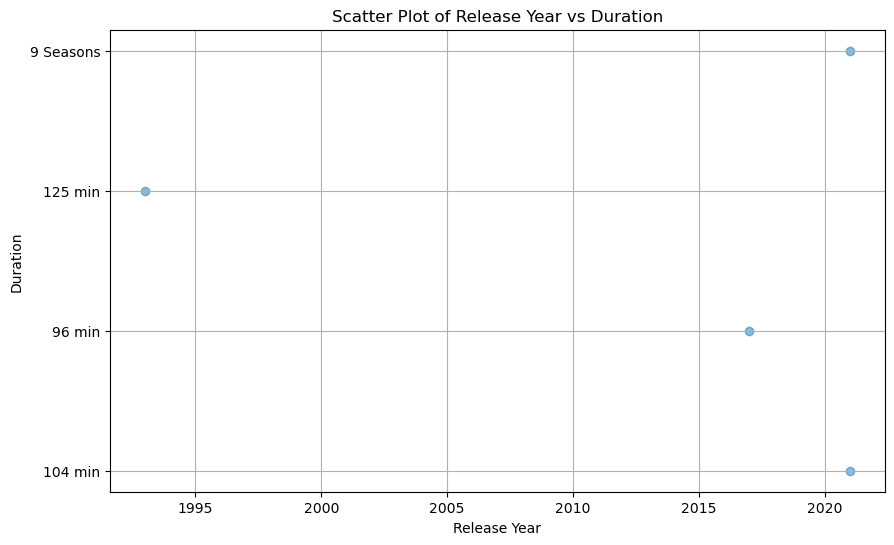

In [85]:
# Selecting two numeric columns for the scatter plot
x = df['release_year']
y = df['duration']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Release Year vs Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

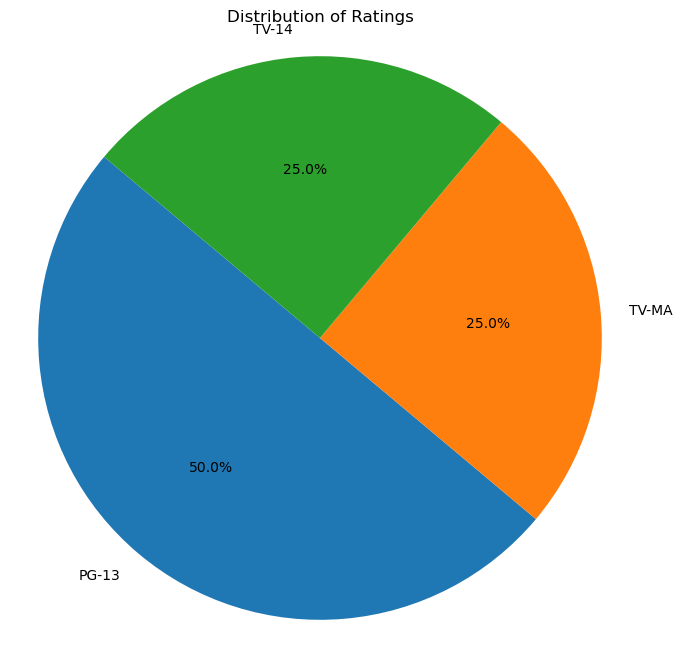

In [87]:
rating_counts = df['rating'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()